In [106]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = np.random.default_rng()
from collections import Counter
from scipy.stats import poisson
from scipy.stats import binom

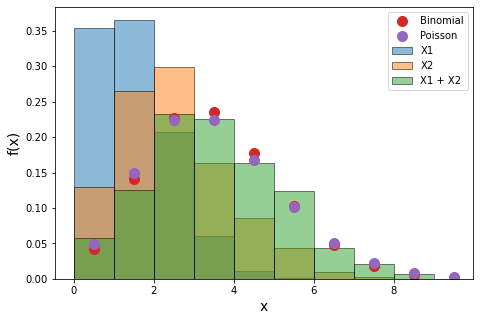

In [107]:
frecuencia_1, frecuencia_2, frecuencia_t = [], [], []

for i in range(1, 1000):
    tiradas_1 = rng.integers(1, high=10, size=10, endpoint=True)
    cuentas = Counter(tiradas_1)
    num_uno_1 = cuentas[1]
    frecuencia_1.append(num_uno_1)  

    tiradas_2 = rng.integers(1, high=10, size=20, endpoint=True)
    cuentas = Counter(tiradas_2)
    num_uno_2 = cuentas[1]
    frecuencia_2.append(num_uno_2)  

    frecuencia_t.append(num_uno_1 + num_uno_2)

bin = np.arange(0,10,1)
hist_1, bins_1 = np.histogram(frecuencia_1, bins = bin)
hist_2, bins_2 = np.histogram(frecuencia_2, bins = bin)
hist_t, bins_t = np.histogram(frecuencia_2, bins = bin)

# Binomial
n = 30
p = 1/10

kmin = binom.ppf(0.01, n, p)
kmax = binom.ppf(0.99, n, p)
k_b = np.arange(kmin, kmax+2)
rv = binom(n, p)

# Poisson
mu = n*p
kmin = poisson.ppf(0.01, mu)
kmax = poisson.ppf(0.99, mu)
k_p = np.arange(kmin, kmax+2)

plt.figure(figsize = (7.5,5))
plt.hist(frecuencia_1, bins_1, alpha=0.5, edgecolor='black', density = True, label = 'X1')
plt.hist(frecuencia_2, bins_2, alpha=0.5, edgecolor='black', density = True, label = 'X2')
plt.hist(frecuencia_t, bins_t, alpha=0.5, edgecolor='black', density = True, label = 'X1 + X2')
plt.plot(k_b+0.5, binom.pmf(k_b, n, p), 'o', markersize = 10, label = 'Binomial')
plt.plot(k_p+0.5, poisson.pmf(k_p, mu), 'o', markersize = 10, label = 'Poisson')
plt.xlabel('x', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.legend(loc = 'best')
plt.show()